<a href="https://colab.research.google.com/github/mkarasu2005/CS19P18-DL-220701517/blob/main/Ex2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7939 - loss: 0.6464 - val_accuracy: 0.9790 - val_loss: 0.0715
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9574 - loss: 0.1435 - val_accuracy: 0.9849 - val_loss: 0.0505
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9711 - loss: 0.1023 - val_accuracy: 0.9866 - val_loss: 0.0449
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9746 - loss: 0.0876 - val_accuracy: 0.9881 - val_loss: 0.0432
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9779 - loss: 0.0692 - val_accuracy: 0.9885 - val_loss: 0.0397


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n Test accuracy: {test_acc:.4f}")
print(f" Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9857 - loss: 0.0415

 Test accuracy: 0.9887
 Test loss: 0.0341


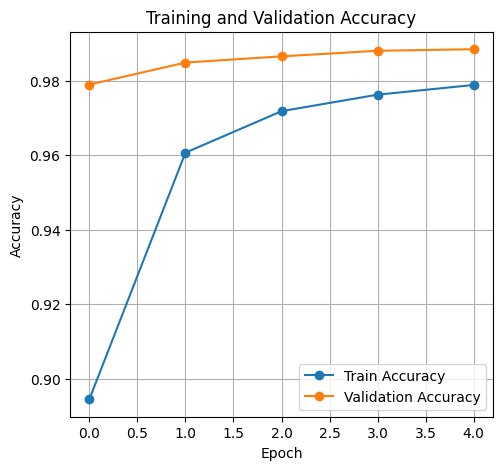

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

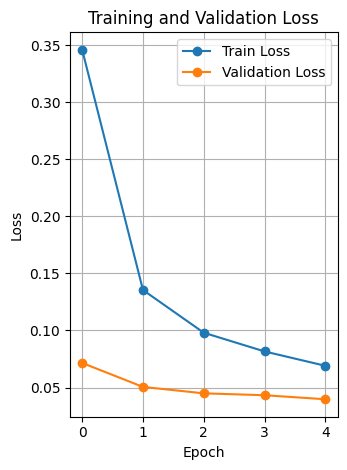

In [6]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [8]:
num_samples = 10
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

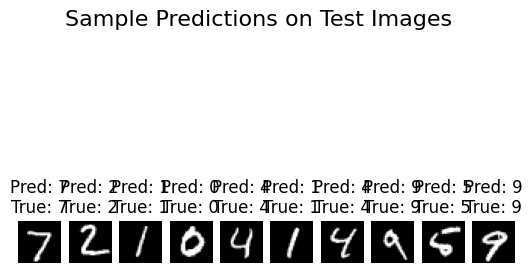

In [9]:
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions on Test Images", fontsize=16)
plt.show()